# Creating, reading, and writing

任何数据分析项目的第一步都可能是从某个文件中读取数据，因此我们需要首先考虑这一点。 在本节中，我们将介绍有关创建pandas Series和DataFrame对象的练习，包括手动和从光盘读取数据。

官方pandas文档的[IO Tools](http://pandas.pydata.org/pandas-docs/stable/io.html)部分提供了有关此主题的全面概述。


In [1]:
import pandas as pd

## Creating data

pandas中有两个核心对象：`DataFrame`和`Series`。

`DataFrame`是一个表。 它包含一系列单独的条目，每个条目都有一定的值。 每个条目对应一行（或记录）和一列。

例如，请考虑以下简单的`DataFrame`：

In [2]:
pd.DataFrame({'Yes':[50, 21], 'No':[131, 2]})

,No,Yes
0,131,50
1,2,21


在此示例中，“0，No”条目的值为131.“0，Yes”条目的值为50，依此类推。

`DataFrame`条目不限于整数。 例如，这是一个`DataFrame`，其值为str字符串：

In [3]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']})

,Bob,Sue
0,I liked it.,Pretty good.
1,It was awful.,Bland.


我们使用`pd.DataFrame`构造函数来生成这些`DataFrame`对象。 声明新语法的语法是一个字典，其键是列名（本例中为Bob和Sue），其值是条目列表。 这是构建新DataFrame的标准方法，也是您最容易遇到的方法。

`dictionary-list`构造函数为列标签分配值，但只使用`0（0,1,2,3，...）`的递增计数作为行标签。 有时候这没关系，但我们经常会想要自己分配这些标签。

`DataFrame`中使用的行标签列表称为索引。 我们可以在构造函数中使用'index'参数为其赋值：

In [4]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 
              'Sue': ['Pretty good.', 'Bland.']},
             index=['Product A', 'Product B'])

,Bob,Sue
Product A,I liked it.,Pretty good.
Product B,It was awful.,Bland.


相比之下，`Series`是一系列数据值。 如果`DataFrame`是表，则`Series`是列表。 事实上，你可以创建一个只有一个列表：

In [5]:
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

`Series`系列本质上是`DataFrame`的单个列。 因此，您可以使用索引参数以与以前相同的方式为系列分配列值。 但是，`Series`没有列名，它只有一个总名称：

In [6]:
pd.Series([30, 35, 40], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product A')

2015 Sales    30
2016 Sales    35
2017 Sales    40
Name: Product A, dtype: int64

`Series`和`DataFrame`密切相关。 将DataFrame视为实际上只是一堆系列“粘合在一起”是有帮助的。 我们将在本教程的下一部分中看到更多内容。

## Reading common file formats

能够手动创建DataFrame和Series非常方便。 但是，大多数情况下，我们实际上不会手动创建自己的数据，我们将使用已经存在的数据。

数据可以以多种不同的形式和格式存储。 到目前为止，其中最基本的是简单的CSV文件。 当您打开CSV文件时，您会看到如下所示的内容：

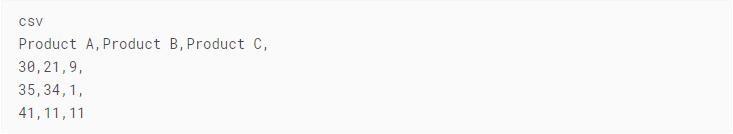

因此，CSV文件是由逗号分隔的值表。 因此名称：“逗号分隔值”或CSV。

现在让我们把我们的玩具数据集放在一边，看看当我们将它读入DataFrame时真正的数据集是什么样的。 我们将使用read_csv函数将数据读入DataFrame。 这样做：

In [7]:
wine_reviews = pd.read_csv("./input/winemag-data-130k-v2.csv")

我们可以使用shape属性来检查生成的DataFrame的大小：

In [9]:
wine_reviews.shape

(129971, 14)

因此，我们的新DataFrame有14万条记录，分为14个不同的列。 那差不多有200万条！

我们可以使用head命令检查结果DataFrame的内容，该命令抓取前五行：

In [10]:
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


pandas的read_csv函数功能丰富，可以指定30多个可选参数。 例如，您可以在此数据集中看到csv文件具有内置索引，而这些pandas没有自动获取。 为了使pandas将该列用于索引（而不是从头开始创建新列），我们可以指定并使用index_col。

In [11]:
wine_reviews = pd.read_csv("./input/winemag-data-130k-v2.csv", index_col=0)
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


让我们看看你可能会遇到的更多数据类型。

首先是古老的Excel电子表格。 Excel文件（XLS或XLST）将自身组织为一系列命名工作表。 每张纸基本上都是一张桌子。 因此，要将数据加载到pandas中，我们需要一个额外的参数：感兴趣的工作表的名称。

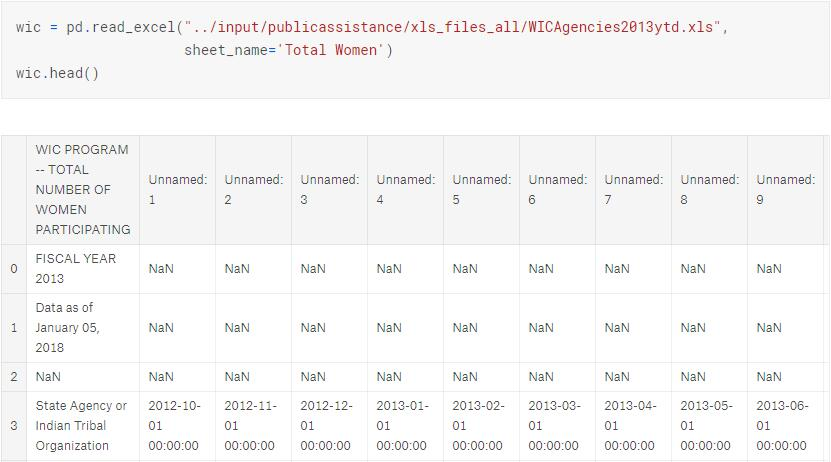

正如您在此示例中所看到的，Excel文件通常不像CSV文件那样格式化。电子表格允许（并鼓励）创建人类可读但不是机器可读的注释和字段。

因此，在我们使用这个特定数据集之前，我们需要稍微清理一下。我们将在下一节中看到如何执行此操作。

现在，让我们转到另一种常见的数据格式：SQL文件。

SQL数据库是最终存储Web上的大多数数据的地方。它们可用于将事物数据存储到像“Kaggle网站上的几乎所有内容”这样复杂的事情上。

连接到SQL数据库需要比从Excel文件读取更多的思考。首先，您需要创建一个连接器，它将处理数据库中的虹吸数据。

pandas不会自动为您执行此操作，因为有许多不同类型的SQL数据库，每个都有自己的连接器。因此，对于SQLite数据库（Kaggle唯一支持的类型），您需要首先执行以下操作（使用Python附带的sqlite3库）：

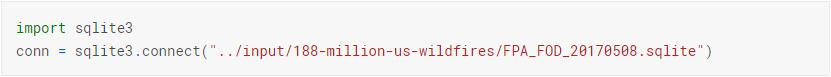

您需要做的另一件事是编写SQL语句。 在内部，SQL数据库的运行方式完全不同。 但是，在外部，它们都提供相同的API，即“结构化查询语言”（或简称SQL ...）。

我们（非常简短地）需要使用SQL来加载数据

然而，出于分析的目的，我们通常可以将SQL数据库视为一组具有名称的表，并且SQL作为从所述表中获取该数据的轻微不便。

所以，不用多说，这里是你需要知道的所有SQL，以便从SQLite和pandas中获取数据：

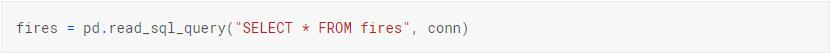

每个SQL语句都有SELECT。 星号（*）是一个通配符，表示“所有”，而FROM fires告诉数据库我们只需要来自fires表的数据。

而且，在另一端，数据：

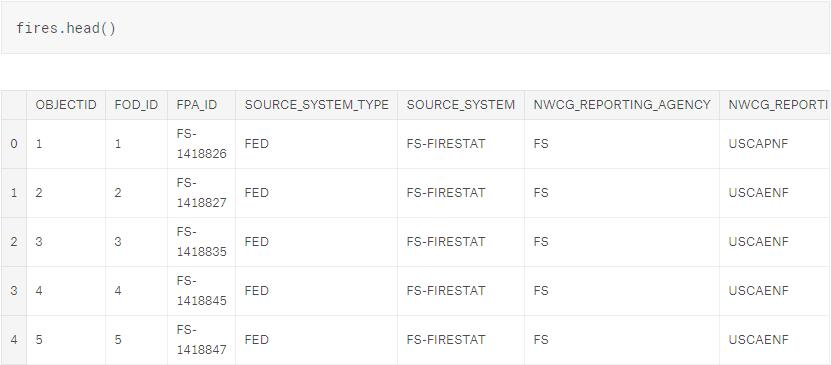

## Writing common file formats

将数据写入文件通常比从一个文件中读取数据更容易，因为pandas会为您处理转换的麻烦。

我们将再次使用CSV文件。 与读取数据的read_csv相反的是to_csv，它写入了它。 使用CSV文件很简单：

In [13]:
wine_reviews.head().to_csv("wine_reviews.csv")

要写回Excel文件，您需要再次使用to_excel和sheet_name：

In [ ]:
wic.to_excel('wic.xlsx', sheet_name='Total Women')

最后，要输出到SQL数据库，请提供我们要将数据放入的数据库中的表的名称，以及连接器：

In [ ]:
conn = sqlite3.connect("fires.sqlite")
fires.head(10).to_sql("fires", conn)